In [ ]:
from gen1D import GEN1D
import numpy as np
import torch as torch

In [18]:
model = GEN1D(num_nodes=10, device='cpu', encoder_dims=[2, 4, 8], decoder_dims=[8, 4, 1])

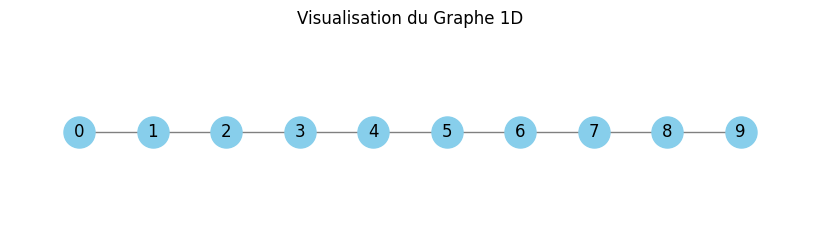

=== Paramètres du Graphe ===
data_idx : -1
Nombre de nœuds : 10
Positions des nœuds :
tensor([[0.0000, 0.0000],
        [0.1111, 0.0000],
        [0.2222, 0.0000],
        [0.3333, 0.0000],
        [0.4444, 0.0000],
        [0.5556, 0.0000],
        [0.6667, 0.0000],
        [0.7778, 0.0000],
        [0.8889, 0.0000],
        [1.0000, 0.0000]])
Matrice d'adjacence (edge_index) :
tensor([[0, 1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9],
        [1, 0, 2, 1, 3, 2, 4, 3, 5, 4, 6, 5, 7, 6, 8, 7, 9, 8]])
Informations de grille : {'L': 1, 'min_X': 0, 'dx': 0.1111111111111111}
Étapes de message (msg_steps) : 9
Positions initiales (ini_pos) :
Non défini


In [20]:
model.visualize_graph()
model.display_graph_info()

In [ ]:
def generate_dataset(hx, x, f, u0=None, uL=None):
    """
    Génère un dataset pour l'équation stationnaire d²u/dx² = f(x) avec des conditions de Dirichlet.

    Paramètres:
        hx (float): Pas de discrétisation.
        x (numpy.ndarray): Positions x discrétisées.
        f (numpy.ndarray): Valeurs de la fonction source f(x).
        u0 (float): Condition de Dirichlet à x = 0 (u(0) = u0).
        uL (float): Condition de Dirichlet à x = L (u(L) = uL).

    Retourne:
        x_torch (torch.Tensor): Positions x discrétisées.
        f_torch (torch.Tensor): Valeurs de la fonction source f(x).
        u_torch (torch.Tensor): Valeurs de la solution numérique u(x).
    """
    N = x.shape[0]
    A = np.zeros((N, N))
    np.fill_diagonal(A, 2 / hx**2)  # Diagonale principale
    np.fill_diagonal(A[1:], -1 / hx**2)  # Diagonale sous-principale
    np.fill_diagonal(A[:, 1:], -1 / hx**2)  # Diagonale sur-principale



    B = np.zeros(N)
    B[1:-1] = f[1:-1]

    # Ajustement pour les conditions aux limites
    if u0 is not None:
        B[0] += u0 / hx**2   # Ajuste B pour inclure la condition u(0) = u0
    if uL is not None:
        B[-1] += uL / hx**2  # Ajuste B pour inclure la condition u(L) = uL

    # Résoudre le système linéaire pour trouver U
    U = np.linalg.solve(A, B)

    # Appliquer les conditions aux limites aux extrémités de U
    if u0 is not None:
        U[0] = u0
    if uL is not None:
        U[-1] = uL


    # Conversion en tenseurs PyTorch
    x_torch = torch.tensor(x, dtype=torch.float32)
    f_torch = torch.tensor(f, dtype=torch.float32)
    u_torch = torch.tensor(U, dtype=torch.float32)

    return x_torch, f_torch, u_torch